# Relatório Projeto SuperComp : Maratona de Filmes

###### Alunos : Rafael Evangelista Monteiro e João Vitor Menezes de Magalhães


## Problema dado:

Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

Entrada: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

Saída: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

### Input do projeto

Para definir a quantidadade de filmes, categorias e restrições, foi utilizado o gerador de inputs fornecido no site da disciplina.

Segue um arquivo input.txt gerado pelo código fornecido como exemplo:

```
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```
* a primeira linha indica que há 10 filmes a serem considerados e 4 categorias;
* a segunda linha indica qual o máximo de filmes que cada categoria pode ter;
* da terceira linha em diante você vai encontrar os n filmes, suas respectivas hora de início, hora de término e categoria pertencente.




## Heurística Gulosa

A primeira implementação da heurística para nosso projeto consiste em uma implementação gulosa (Greedy). Essa heurística tem como objetivo principal buscar uma solução global ótima.

Dessa forma para iniciar a implementação, fizemos algumas escolhas de filtros para atingir o resultado esperado.

1. Os filmes que terminam 00:00 (meia-noite), deverão mudar para 24:00, já que os filmes só podem ser assistidos em um dia.


2. Os filmes que terminam em um horário depois que começa, por exemplo, começa 23:00 e acaba 2:00, vão ser retirados já que os filmes só podem ser assistidos em um dia


3. Escolhi ordenar os filmes em ordem crescente do horário de fim, para que assim, os filmes que terminam primeiro sejam priorizados 

### Implementação

O primeiro passo foi criar uma struct de como seriam os filmes:

``` c++
struct filme {
    int inicio;
    int fim;
    int categoria;
};
```

Assim podemos ler o arquivo de input, para isso, basta usar o cin, como se alguém estivesse digitando os dados:

```c++
int n, n_categories;
    cin >> n >> n_categories;

    vector<filme> movies(n);
    vector<int> categoriesMax(n_categories+1);

for (int i = 1; i < n_categories+1; i++) {
        cin >> categoriesMax[i];
    }
```
O vetor de categorias máximas foi somado com 1 para evitar confusão na hora de ler o vetor. Assim, a categoria 1 ficará no categoriesMax[1] e assim por diante.

A partir disso podemos aplicar os filtros mencionados anteriormente.

``` c++
for (int i = 0; i < n; i++) {
        cin >> movies[i].inicio >> movies[i].fim >> movies[i].categoria;
        if (movies[i].fim == 0){
            movies[i].fim = 24;
        }
    }
    
    filtro(movies);
    sort(movies.begin(), movies.end(), compareMovies);
```
O for é utilizado para criar os filmes e os ifs para aplicar os filtros nos filmes que terminam 00:00 e/ou tem um valor de início maior ou igual ao de fim.

O ```sort(movies.begin(), movies.end(), compareMovies);``` utiliza a função compareMovies para ordenar os filmes em ordem crescente do horário de fim. Segue essa função:

```c++
bool compareMovies(filme a, filme b) {
    return a.fim < b.fim;
}
```

O ``` filtro(movies);``` utiliza a função filtro:

```c++
void filtro (vector<filme> &movies){
        movies.erase(
        remove_if(movies.begin(), movies.end(), [](const filme& movie) {
            return movie.fim <= movie.inicio;
    }), movies.end());
}
``` 


#####  Isso feito podemos de fato implementar a heurística gulosa:
``` c++
vector<filme> chooseMovies(vector<filme>& movies, vector<int>& categoriesMax) {
    bitset<24> movieTimes;
    vector<filme> chosenMovies;

    for (int i = 0; i < movies.size(); i++) {
        if (categoriesMax[movies[i].categoria] > 0 && timeAvailable(movieTimes, movies[i])) {
            chosenMovies.push_back(movies[i]);
            for (int j = movies[i].inicio; j < movies[i].fim; j++) {
                movieTimes[j] = 1;
            }
            categoriesMax[movies[i].categoria]--;
        }   
    }

    return chosenMovies;
}
```

Para identificação de quais horários foram selecionados e/ou estão livres, utilizamos um bitset<24>. Dessa forma, a função timeAvailable checa esse bitset, se o horário estiver disponível ele retorna true, se não, retorna false. Segue a implementação do timeAvailable:


```c++
bool timeAvailable(bitset<24>& times, filme movie){
    for (int i = movie.inicio; i < movie.fim; i++) {
        if (times[i] == 1) {
            return false;
        }
    }
    return true;
}
```

## Aleatoriedade

Esse algoritmo é uma variação do algoritmo guloso. A principal mudança entre a gulosa e essa é que ela possui 25% de chance de escolher aleatoriamente entre os filmes, considerando as limitações de tempo.
Dessa forma, a única mudança para a implementação foi a alteração na função chooseMovies.

Para gerar o número aleatório, usamos a função vista em aula para números de 0.0 a 1.0. 
``` c++
    std::default_random_engine generator;
    std::uniform_real_distribution<double> distribution(0.0, 1.0);
    distribuition(generator)

    
```

Assim, caso o número seja <= 0.25, ou seja 25% de chance, um filme aleatório é selecionado e caso ele esteja dentro das limitações, o filme é adicionado nos filmes escolhidos, o horário dele é alocado no bitset e sua categoria diminui.

```c++
if (distribution(generator) <= 0.25) {
            int randomIndex = rand() % movies.size();
            if (categoriesMax[movies[randomIndex].categoria] > 0 && timeAvailable(movieTimes, movies[randomIndex])) {
                chosenMovies.push_back(movies[randomIndex]);
                for (int j = movies[randomIndex].inicio; j < movies[randomIndex].fim; j++) {
                    movieTimes[j] = 1;
                }
                categoriesMax[movies[randomIndex].categoria]--;
            }
        }
```

Caso contrário, ele continua fazendo o que ele fazia na gulosa.

```c++
else if (categoriesMax[movies[i].categoria] > 0 && timeAvailable(movieTimes, movies[i])) {
            chosenMovies.push_back(movies[i]);
            for (int j = movies[i].inicio; j < movies[i].fim; j++) {
                movieTimes[j] = 1;
            }
            categoriesMax[movies[i].categoria]--;
        }
```



## Rodando as heurísticas

Para arquivos que possuiam o boost, compilamos os arquivos .cpp utilizando ```g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random {arquivo}.cpp -o {executavel} ``` e ```g++ -Wall -O3 -g {arquivo}.cpp -o {executável} ``` para usar posteriormente o valgrind.

Por fim, para gerar os inputs e outputs uzamos as células abaixo.


In [1]:
import pandas as pd
def filmes_escolhidos(file):
    with open(file, 'r') as f:
        line = f.readline()
        filmes = line.split(':')
        return int(filmes[1])
    
def tempo_tela(file):
    with open(file, 'r') as f:
        lines = f.read().strip().split('\n')[1:] # read lines from file and ignore first line
        return( sum(int(line.split()[1]) - int(line.split()[0]) for line in lines) )
    
qnt_filmes = [1000,100000, 500000, 1000000, 10000000]
qnt_categorias = [5,10,20,40]

for i in qnt_filmes:
    for j in qnt_categorias:
        !./input {i} {j}
        !mv input.txt Inputs/input-{i}-{j}.txt        

In [2]:
import time
runtime_gulosa = {}
filmes_gulosa = {}
tela_gulosa = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_gulosa:
            runtime_gulosa[key] = []
        if key not in filmes_gulosa:
            filmes_gulosa[key] = []
        if key not in tela_gulosa:
            tela_gulosa[key] = []
        start_time = time.time()
        !./gulosa < Inputs/input-{i}-{j}.txt > Outputs/outgulosa-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_gulosa[key].append(runtime)
        filmes_gulosa[key].append(filmes_escolhidos(f'Outputs/outgulosa-{i}-{j}.txt'))
        tela_gulosa[key].append(tempo_tela(f'Outputs/outgulosa-{i}-{j}.txt'))

['0 1 2', '1 2 2', '2 3 1', '3 4 4', '4 5 4', '5 6 1', '6 7 2', '7 8 2', '8 9 1', '9 10 4', '10 11 1', '11 12 5', '12 13 3', '13 15 3', '15 16 4', '16 17 3', '17 18 1', '18 19 2', '19 20 5', '20 21 5', '21 23 5']
['0 1 3', '1 2 10', '2 3 7', '3 4 1', '4 5 1', '5 6 6', '6 7 8', '7 8 10', '8 10 1', '10 11 9', '11 12 3', '12 13 3', '13 14 6', '14 15 9', '15 16 3', '16 17 2', '17 19 2', '19 21 10', '21 22 1', '22 24 1']
['0 2 6', '2 3 8', '3 4 5', '4 6 14', '6 7 18', '7 8 5', '8 9 5', '9 10 10', '11 12 20', '12 13 2', '13 14 10', '14 16 5', '16 17 12', '17 18 2', '18 19 7', '19 20 16', '20 21 1', '21 22 20', '22 23 12']
['0 1 39', '1 2 31', '2 3 30', '3 4 25', '4 5 38', '5 6 38', '6 7 24', '7 8 28', '8 9 17', '9 10 18', '10 11 11', '11 12 36', '12 13 10', '13 14 22', '14 15 19', '15 16 14', '16 17 21', '17 18 40', '18 19 19', '19 20 38', '20 21 40', '21 22 9', '22 23 37', '23 24 16']
['0 1 3', '1 2 5', '2 3 3', '3 4 2', '4 5 4', '5 6 2', '6 7 2', '7 8 1', '8 9 1', '9 10 3', '10 11 5', '11 

In [3]:
import time
runtime_aleatoriedade = {}
filmes_aleatoriedade = {}
tela_aleatoriedade = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_aleatoriedade:
            runtime_aleatoriedade[key] = []
        if key not in filmes_aleatoriedade:
            filmes_aleatoriedade[key] = []
        if key not in tela_aleatoriedade:
            tela_aleatoriedade[key] = []
        start_time = time.time()
        !./aleatoriedade < Inputs/input-{i}-{j}.txt > Outputs/outaleatorio-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_aleatoriedade[key].append(runtime)
        filmes_aleatoriedade[key].append(filmes_escolhidos(f'Outputs/outaleatorio-{i}-{j}.txt'))
        tela_aleatoriedade[key].append(tempo_tela(f'Outputs/outaleatorio-{i}-{j}.txt'))

['0 1 2', '1 2 2', '2 3 1', '3 4 5', '4 7 3', '8 11 2', '11 13 5', '13 15 5', '15 18 3', '18 19 1', '19 22 3', '22 23 1', '23 24 1']
['0 1 7', '1 2 10', '2 6 9', '6 7 8', '7 11 3', '11 12 3', '12 15 6', '15 16 3', '16 17 2', '17 19 6', '19 21 1', '21 22 1', '22 24 5']
['0 2 9', '2 3 8', '3 4 5', '4 8 19', '8 10 16', '10 13 19', '13 14 19', '14 16 13', '16 18 13', '18 19 11', '19 20 16', '20 21 1', '21 22 8', '22 24 18']
['0 1 38', '1 3 25', '3 4 25', '4 5 38', '5 9 18', '9 11 26', '11 12 36', '12 14 11', '14 15 19', '15 18 2', '18 19 19', '19 22 22', '22 24 39']
['0 1 1', '1 3 5', '3 6 3', '6 7 3', '7 8 4', '8 9 3', '9 13 5', '13 15 1', '15 16 2', '16 18 5', '18 20 3', '20 21 2', '21 24 5']
['0 1 1', '1 2 1', '2 5 10', '5 7 6', '7 11 8', '11 12 5', '12 13 5', '13 15 5', '15 16 4', '16 17 5', '17 18 9', '18 22 7', '22 24 10']
['0 1 18', '1 4 14', '4 6 2', '6 8 9', '8 11 2', '11 14 18', '14 15 5', '15 18 14', '18 19 16', '19 21 17', '21 22 16', '22 24 13']
['0 1 27', '1 3 27', '3 6 11', 

A fim de não perder os outputs, foi colocado em um dataframe e em csv

In [4]:

tempo_guloso = pd.DataFrame.from_dict(runtime_gulosa)
tempo_aleatorio = pd.DataFrame.from_dict(runtime_aleatoriedade)
resultado_guloso = pd.DataFrame.from_dict(filmes_gulosa)
resultado_aleatorio = pd.DataFrame.from_dict(filmes_aleatoriedade)
tela_gulosa = pd.DataFrame.from_dict(tela_gulosa)
tela_aleatorio = pd.DataFrame.from_dict(tela_aleatoriedade)

#para não perder
tempo_guloso.to_csv('tempo_guloso.csv', index=False)
tempo_aleatorio.to_csv('tempo_aleatorio.csv', index=False)
resultado_guloso.to_csv('resultado_guloso.csv', index=False)
resultado_aleatorio.to_csv('resultado_aleatorio.csv', index=False)
tela_gulosa.to_csv('tela_gulosa.csv', index=False)
tela_aleatorio.to_csv('tela_aleatorio.csv', index=False)



In [5]:
#tempo_guloso.read_csv('tempo_guloso.csv')
tempo_guloso 


,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,0.14414,0.12436,0.120303,0.119977,0.174917,0.176402,0.182721,0.177014,0.353888,0.366598,0.378625,0.374875,0.57452,0.60283,0.613835,0.616843,4.80565,4.868999,5.025459,5.062148


In [6]:
tempo_aleatorio 


,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,0.14557,0.12064,0.12151,0.121104,0.184626,0.173705,0.174151,0.201703,0.390946,0.403635,0.368559,0.390415,0.63967,0.648881,0.670145,0.666739,5.29798,5.074677,5.422472,5.464515


In [7]:
resultado_guloso 


,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,21,20,19,24,14,24,24,24,13,24,24,24,13,24,24,24,13,24,24,24


In [8]:
resultado_aleatorio

,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,13,13,14,13,13,13,12,13,13,11,11,10,12,10,13,11,12,11,12,13


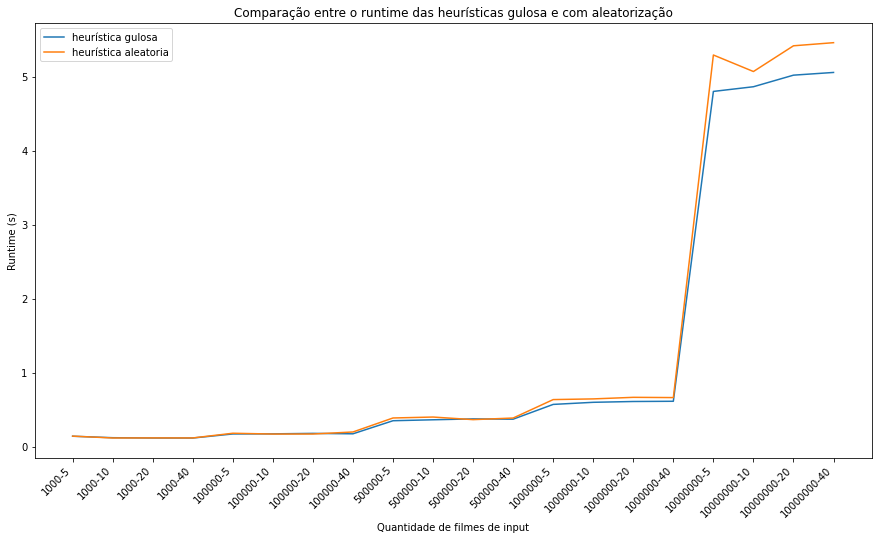

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=tempo_guloso.T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(data=tempo_aleatorio.T.reset_index(), x='index', y=0, label='heurística aleatoria')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Runtime (s)')
plt.title('Comparação entre o runtime das heurísticas gulosa e com aleatorização')
plt.legend()
plt.show()

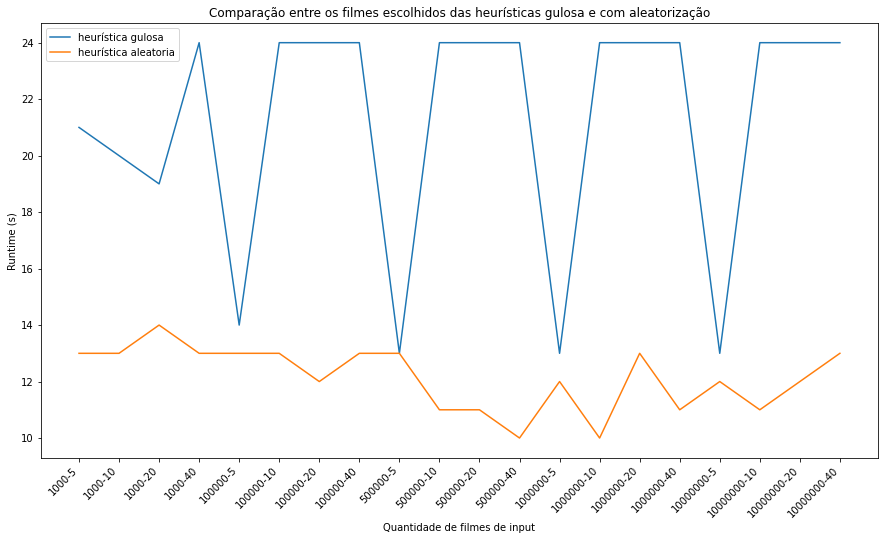

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=resultado_guloso.T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(data=resultado_aleatorio.T.reset_index(), x='index', y=0, label='heurística aleatoria')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Runtime (s)')
plt.title('Comparação entre os filmes escolhidos das heurísticas gulosa e com aleatorização')
plt.legend()
plt.show()

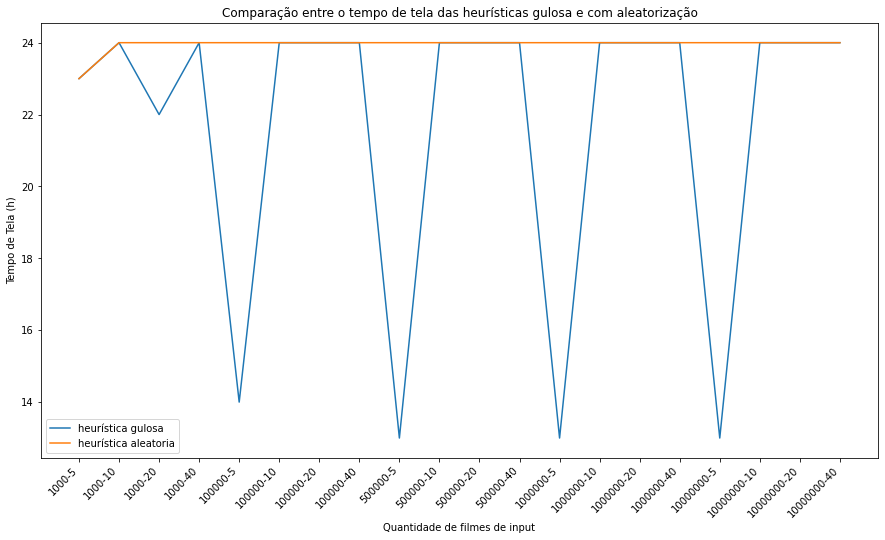

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=tela_gulosa.T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(data=tela_aleatorio.T.reset_index(), x='index', y=0, label='heurística aleatoria')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Tempo de Tela (h)')
plt.title('Comparação entre o tempo de tela das heurísticas gulosa e com aleatorização')
plt.legend()
plt.show()

<AxesSubplot:xlabel='index', ylabel='0'>

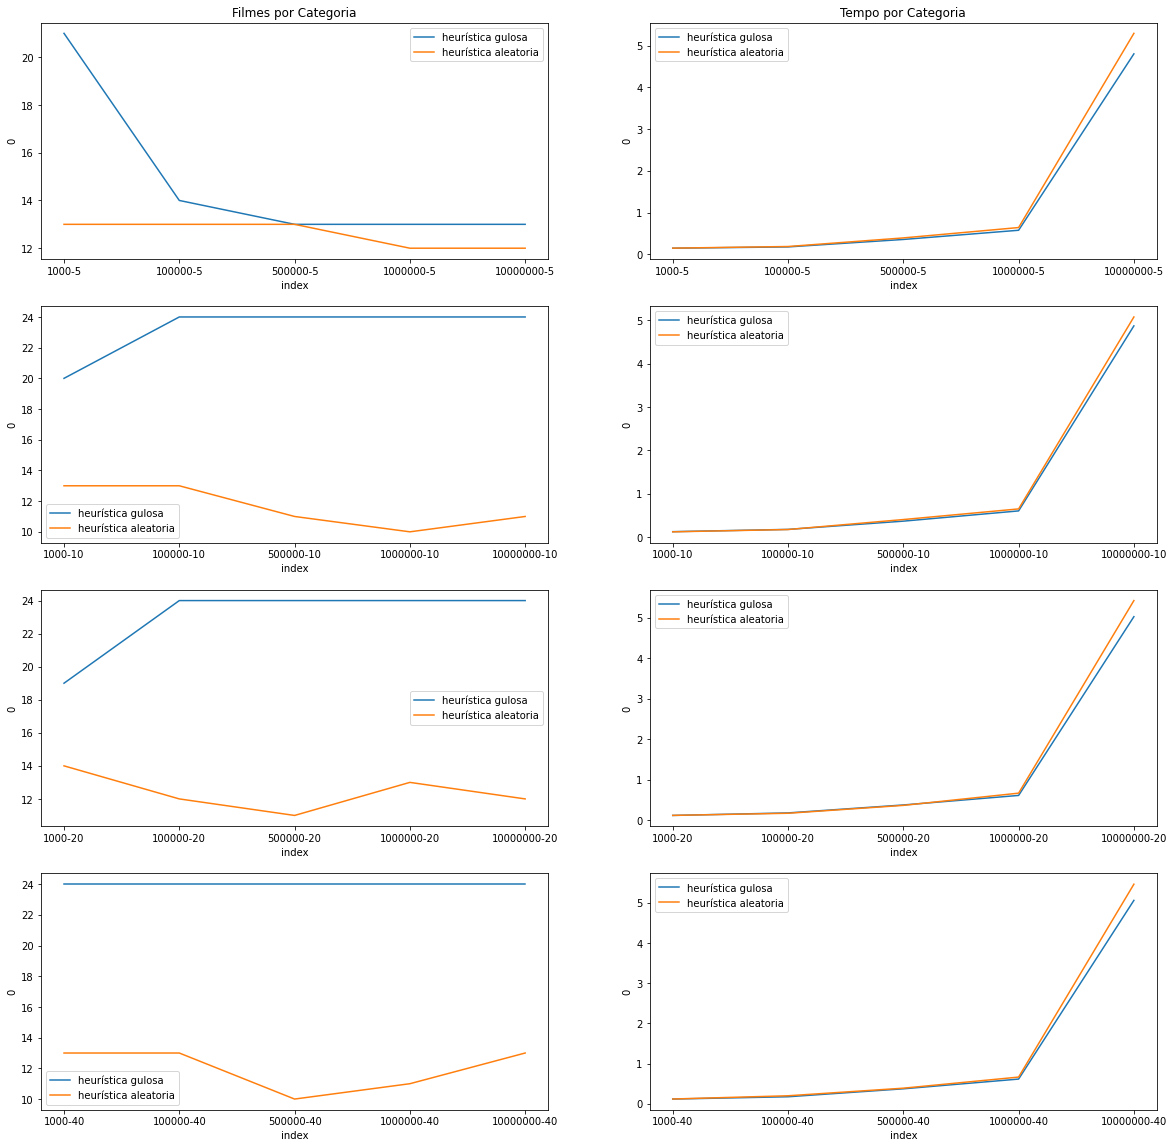

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.lineplot(ax=axes[0,0],data=resultado_guloso.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[0,0],data=resultado_aleatorio.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística aleatoria')
axes[0,0].set(title='Filmes por Categoria')

sns.lineplot(ax=axes[1,0],data=resultado_guloso.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[1,0],data=resultado_aleatorio.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[2,0],data=resultado_guloso.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[2,0],data=resultado_aleatorio.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[3,0],data=resultado_guloso.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[3,0],data=resultado_aleatorio.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[0,1],data=tempo_guloso.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[0,1],data=tempo_aleatorio.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística aleatoria')
axes[0,1].set(title='Tempo por Categoria')

sns.lineplot(ax=axes[1,1],data=tempo_guloso.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[1,1],data=tempo_aleatorio.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[2,1],data=tempo_guloso.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[2,1],data=tempo_aleatorio.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[3,1],data=tempo_guloso.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[3,1],data=tempo_aleatorio.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística aleatoria')

<AxesSubplot:xlabel='index', ylabel='0'>

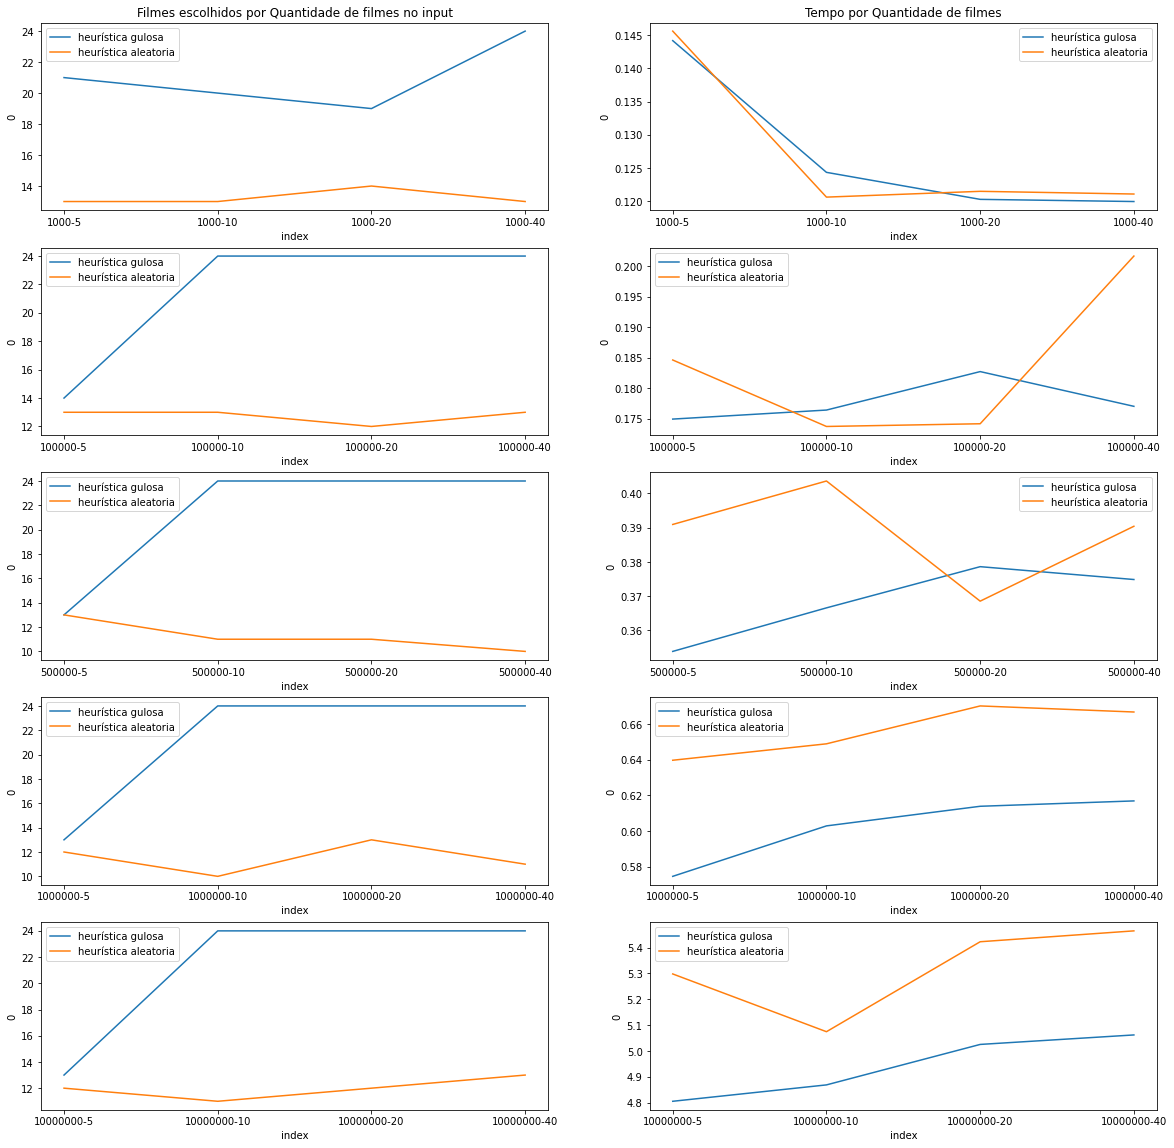

In [33]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
sns.lineplot(ax=axes[0,0],data=resultado_guloso.filter(regex='1000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[0,0],data=resultado_aleatorio.filter(regex='1000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')
axes[0,0].set(title='Filmes escolhidos por Quantidade de filmes no input')

sns.lineplot(ax=axes[1,0],data=resultado_guloso.filter(regex='100000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[1,0],data=resultado_aleatorio.filter(regex='100000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[2,0],data=resultado_guloso.filter(regex='500000').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[2,0],data=resultado_aleatorio.filter(regex='500000').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[3,0],data=resultado_guloso.filter(regex='1000000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[3,0],data=resultado_aleatorio.filter(regex='1000000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[4,0],data=resultado_guloso.filter(regex='10000000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[4,0],data=resultado_aleatorio.filter(regex='10000000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[0,1],data=tempo_guloso.filter(regex='1000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[0,1],data=tempo_aleatorio.filter(regex='1000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')
axes[0,1].set(title='Tempo por Quantidade de filmes')

sns.lineplot(ax=axes[1,1],data=tempo_guloso.filter(regex='100000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[1,1],data=tempo_aleatorio.filter(regex='100000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[2,1],data=tempo_guloso.filter(regex='500000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[2,1],data=tempo_aleatorio.filter(regex='500000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[3,1],data=tempo_guloso.filter(regex='1000000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[3,1],data=tempo_aleatorio.filter(regex='1000000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[4,1],data=tempo_guloso.filter(regex='10000000-').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[4,1],data=tempo_aleatorio.filter(regex='10000000-').T.reset_index(), x='index', y=0, label='heurística aleatoria')

## Análise dos resultados dos gráficos

1. Analisando o gráfico de runtime x input de filmes é perceptível que a partir de 10.000.000 de filmes, independentemente da categoria, o runtime aumenta consideravelmente.

2. Analisando o gráfico de escolha de filmes x input de filmes é perceptível que a heurística gulosa sempre escolhe uma maior quantidade de filme, tendo uma discrepância grande em categorias baixas. Enquanto o aleatório, permanece mais constante na quantidade de filmes, mesmo em categorias baixas, mas no geral, seleciona poucos filmes.

3. Analisando o gráfico de tempo de tela conseguimos ver que o aleatorizado mantém um tempo de tela sempre maior que 23h. Por outro lado, a heurística gulosa não é tão constante, tendo um desempenho ruim com um número de categorias baixo

4. Separando por categoria, nada muito diferente foi notado. O runtime entre as heurísticas é bem semelhante, mas a quantidade de filmes escolhidos na gulosa é maior

5. Separando por quantidade de filmes no input nada muito diferente foi notado também. A única coisa perceptível é que para uma grande quantidade de filmes, por exemplo 10 milhões, a aleatorizada tem um runtime maior. Isso faz sentido já que são mais números randômicos gerados e mais condições, o que pode levar um pouco mais de tempo para rodar

## Valgrind

Para esta etapa, foi utilizado o  ```g++ -Wall -O3 -g {arquivo}.cpp -o {executável} ``` para compilar, além de utilizar ```valgrind --tool=callgrind ./{executavel] < Inputs/input-100000-5.txt``` e ``` !callgrind_annotate --show-percs=yes callgrind.out.{PID} {arquivo}.cpp```

In [13]:

!valgrind --tool=callgrind ./gulosa < Inputs/input-100000-5.txt

==38333== Callgrind, a call-graph generating cache profiler
==38333== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==38333== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==38333== Command: ./gulosa
==38333== 
==38333== For interactive control, run 'callgrind_control -h'.
Número de filmes:14
0 1 3
1 2 5
2 3 3
3 4 2
4 5 4
5 6 2
6 7 2
7 8 1
8 9 1
9 10 3
10 11 5
11 12 3
12 13 5
13 14 5
==38333== 
==38333== Events    : Ir
==38333== Collected : 364832028
==38333== 
==38333== I   refs:      364,832,028


In [28]:
!callgrind_annotate --show-percs=yes callgrind.out.38333 gulosa.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.38333' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 78304512
Trigger: Program termination
Profiled target:  ./gulosa (PID 38333, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   gulosa.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir                   
--------------------------------------------------------------------------------
364,832,028 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                   file:function
--------------------------------------------------------------------------------
74,007,356 (20.29%)  ???:std::istreambuf_iterator<c

In [15]:
!valgrind --tool=callgrind ./aleatoriedade < Inputs/input-100000-5.txt

==38340== Callgrind, a call-graph generating cache profiler
==38340== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==38340== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==38340== Command: ./aleatoriedade
==38340== 
==38340== For interactive control, run 'callgrind_control -h'.
Número de filmes:13
0 1 1
1 3 5
3 6 3
6 7 3
7 8 4
8 9 3
9 13 5
13 15 1
15 16 2
16 18 5
18 20 3
20 21 2
21 24 5
==38340== 
==38340== Events    : Ir
==38340== Collected : 370924995
==38340== 
==38340== I   refs:      370,924,995


In [29]:
!callgrind_annotate --show-percs=yes callgrind.out.38340 aleatoriedade.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.38340' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 79020571
Trigger: Program termination
Profiled target:  ./aleatoriedade (PID 38340, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   aleatoriedade.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir                   
--------------------------------------------------------------------------------
370,924,995 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                   file:function
--------------------------------------------------------------------------------
74,007,356 (19.95%)  ???:std::istream

### Análise do Profiling

Ao analisar o valgrind de ambos os algoritmos, podemos ver que a diferença entre eles é pequena mas a heurística gulosa se destaca tendo algumas instruções a menos que o aleatorizado. Também é possivel observar que as partes menos otimizadas do código são principalmente os loop for.

# Parte 2 do projeto

## Busca Exaustiva

Para dar continuidade ao projeto buscamos uma outra abordagem para resolver o problema: A Busca Exaustiva. Nessa abordagem, consideramos todas as combinações possíveis de filmes e verificamos se elas satisfazem as restrições estabelecidas.
Uma das principais vantagens da busca exaustiva é que ela garante a obtenção da solução ótima. Isso significa que, se houver uma combinação de filmes que maximize a quantidade de filmes escolhidos, a busca exaustiva irá encontrá-la.
No entanto, a busca exaustiva também apresenta algumas limitações. Uma delas é o seu alto custo computacional. Como estamos considerando todas as combinações possíveis, o número de iterações cresce exponencialmente com o tamanho do problema. Isso pode tornar a execução lenta e inviável para problemas com um grande número de filmes, já que sua complexidade é O(2^n).


## Implementação do algoritmo

Para implementarmos a busca exaustiva utilizamos parte dos algoritmos de busca exaustiva e gulosa, mas a função principal foi alterada. Implementamos a função _**chooseMovies**_ que recebe um vetor de filmes e um vetor de números máximos de categorias. A função retorna um vetor contendo a seleção de filmes que maximiza o número de filmes assistidos, seguindo as restrições de horários e números máximos de cada categoria.

```c++
vector<filme> chooseMovies(vector<filme>& movies, vector<int>& categoriesMax) {
    int n = movies.size();
    int combinations = 1 << n; // 2^n
    vector<filme> chosenMovies;
    bitset<24> movieTimes;

    for (int i = 1; i < combinations; i++) {
        bool valid = true;
        vector<filme> currentSelection;
        bitset<24> currentMovieTimes;
        vector<int> currentCategoriesMax = categoriesMax;

        for (int j = 0; j < n; j++) {
            if ((i >> j) & 1) { 
                filme currentMovie = movies[j];
                if (currentCategoriesMax[currentMovie.categoria - 1] > 0 && isTimeAvailable(currentMovieTimes, currentMovie)) {
                    currentSelection.push_back(currentMovie);
                    for (int k = currentMovie.inicio; k < currentMovie.fim; k++) {
                        currentMovieTimes[k] = true;
                    }
                    currentCategoriesMax[currentMovie.categoria - 1]--;
                } else {
                    valid = false;
                    break;
                }
            }
        }

            if (valid && currentSelection.size() > chosenMovies.size()) {
                chosenMovies = currentSelection;
            }
        }

    return chosenMovies;
}
```


### Variáveis iniciais:

- n é o número de filmes no vetor movies.
- combinations é o número total de combinações possíveis de seleções de filmes, calculado como 2 elevado a n.
- chosenMovies é o vetor que armazenará a seleção de filmes escolhida.
- movieTimes é um bitset de tamanho 24 que representa a disponibilidade de horários para os filmes.

### Loop externo:

- O loop externo itera de 1 a combinations, representando todas as possíveis combinações de seleções de filmes.
- Cada iteração do loop externo representa uma seleção de filmes candidata.

### Verificação da validade da seleção:

- A variável valid é inicializada como verdadeira para cada seleção candidata.
- currentSelection é um vetor que armazenará a seleção de filmes atualmente sendo considerada.
- currentMovieTimes é um bitset que representa a disponibilidade de horários para os filmes selecionados até o momento.
- currentCategoriesMax é uma cópia do vetor categoriesMax que armazena o número máximo de filmes permitidos em cada categoria.

### Loop interno:

- O loop interno itera sobre cada filme no vetor movies.
- A condição (i >> j) & 1 verifica se o j-ésimo filme está incluído na seleção candidata. Isso é feito usando a operação shift right (>>) e o operador bitwise AND (&).
- Se o filme estiver incluído na seleção:
- É verificado se há disponibilidade de horário e se o número máximo de filmes permitidos na categoria ainda não foi atingido.
- Se as condições forem atendidas, o filme é adicionado à currentSelection, a disponibilidade de horário é atualizada em currentMovieTimes e o número máximo de filmes permitidos na categoria é decrementado em currentCategoriesMax.
- Caso contrário, a seleção é considerada inválida (valid é definido como falso) e o loop interno é interrompido com um break.

### Retorno do resultado:

- Após o loop externo, a função retorna o vetor chosenMovies, que contém a seleção de filmes que maximiza o número de filmes assistidos.

In [2]:
qnt_filmes = [5,10,15,20,25,30]
qnt_categorias = [5,10]

for i in qnt_filmes:
    for j in qnt_categorias:
        !./input {i} {j} 
        !mv input.txt Inputs-2/input-{i}-{j}.txt     

In [3]:
def filmes_escolhidos(file):
    with open(file, 'r') as f:
        line = f.readline()
        filmes = line.split(':')
        return int(filmes[1])
    
def tempo_tela(file):
    with open(file, 'r') as f:
        lines = f.read().strip().split('\n')[1:] # read lines from file and ignore first line
        return( sum(int(line.split()[1]) - int(line.split()[0]) for line in lines) )

In [6]:
!g++ exaustiva.cpp -o exaustiva

import time
runtime_exaustiva = {}
filmes_exaustiva = {}
tela_exaustiva = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_exaustiva:
            runtime_exaustiva[key] = []
        if key not in filmes_exaustiva:
            filmes_exaustiva[key] = []
        if key not in tela_exaustiva:
            tela_exaustiva[key] = []
        start_time = time.time()
        !./exaustiva < Inputs-2/input-{i}-{j}.txt > Outputs-2/outexaustiva-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_exaustiva[key].append(runtime)
        filmes_exaustiva[key].append(filmes_escolhidos(f'Outputs-2/outexaustiva-{i}-{j}.txt'))
        tela_exaustiva[key].append(tempo_tela(f'Outputs-2/outexaustiva-{i}-{j}.txt'))

In [7]:
runtime_exaustiva

{'5-5': [0.11733865737915039],
 '5-10': [0.11780190467834473],
 '10-5': [0.11798477172851562],
 '10-10': [0.1207737922668457],
 '15-5': [0.1369032859802246],
 '15-10': [0.13729214668273926],
 '20-5': [0.9581894874572754],
 '20-10': [0.42296719551086426],
 '25-5': [6.3634607791900635],
 '25-10': [5.958924293518066],
 '30-5': [212.1065800189972],
 '30-10': [63.75371026992798]}

## Como otimizar o código para que ele não demore tanto ??
### Paralelismo com OpenMP
Uma das formas de otimizar o tempo de execução é com o paralelismo!!
Isso se deve pois o paralelismo permite que múltiplas tarefas sejam executadas simultaneamente, dividindo o trabalho entre diferentes threads ou processos, o que pode resultar em uma significativa redução do tempo de execução.

No contexto da busca exaustiva, podemos aproveitar o paralelismo para explorar diferentes combinações de filmes de forma simultânea. Ao distribuir as iterações do loop de busca entre várias threads, podemos realizar cálculos em paralelo, o que resulta em um aumento do desempenho.

## Implementação do OpenMP

Para paralelisarmos o código com o OpenMP o único lugar que precisava de uma alteração era na função _**chooseMovies**_, além de adicionarmos a biblioteca _**omp.h**_ e compilarmos com a tag **-fopenmp**. Dessa forma obtivemos o seguinte código.

```c++
vector<filme> chooseMovies(vector<filme>& movies, vector<int>& categoriesMax) {
    int n = movies.size();
    int combinations = 1 << n; // 2^n
    vector<filme> chosenMovies;
    bitset<24> movieTimes;

    #pragma omp parallel for
    for (int i = 1; i < combinations; i++) {
        bool valid = true;
        vector<filme> currentSelection;
        bitset<24> currentMovieTimes;
        vector<int> currentCategoriesMax = categoriesMax;

        for (int j = 0; j < n; j++) {
            if ((i >> j) & 1) { 
                filme currentMovie = movies[j];
                if (currentCategoriesMax[currentMovie.categoria - 1] > 0 && isTimeAvailable(currentMovieTimes, currentMovie)) {
                    currentSelection.push_back(currentMovie);
                    for (int k = currentMovie.inicio; k < currentMovie.fim; k++) {
                        currentMovieTimes[k] = true;
                    }
                    currentCategoriesMax[currentMovie.categoria - 1]--;
                } else {
                    valid = false;
                    break;
                }
            }
        }

        #pragma omp critical
        {
            if (valid && currentSelection.size() > chosenMovies.size()) {
                chosenMovies = currentSelection;
            }
        }
    }

    return chosenMovies;
}
```


O novo código conta com duas novas seções, são elas:

### Paralelização com OpenMP:

- A diretiva #pragma omp parallel for é usada para paralelizar o loop externo, permitindo que várias iterações sejam executadas em paralelo por diferentes threads.

### Seção crítica:

- A seção crítica é usada para atualizar a chosenMovies com a seleção atual, desde que a seleção seja válida e tenha um tamanho maior que a seleção atualmente escolhida.
- A diretiva #pragma omp critical garante que apenas uma thread possa acessar essa seção crítica por vez, evitando condições de corrida.

In [3]:
!g++ -fopenmp exaustiva.cpp -o exaustiva

import time
runtime_openmp = {}
filmes_openmp = {}
tela_openmp = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_openmp:
            runtime_openmp[key] = []
        if key not in filmes_openmp:
            filmes_openmp[key] = []
        if key not in tela_openmp:
            tela_openmp[key] = []
        start_time = time.time()
        !./exaustiva < Inputs-2/input-{i}-{j}.txt > Outputs-2/outopenmp-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_openmp[key].append(runtime)
        filmes_openmp[key].append(filmes_escolhidos(f'Outputs-2/outopenmp-{i}-{j}.txt'))
        tela_openmp[key].append(tempo_tela(f'Outputs-2/outopenmp-{i}-{j}.txt'))

NameError: name 'filmes_escolhidos' is not defined

In [9]:
runtime_openmp

{'5-5': [0.12223577499389648],
 '5-10': [0.11734390258789062],
 '10-5': [0.1208353042602539],
 '10-10': [0.12402820587158203],
 '15-5': [0.12815070152282715],
 '15-10': [0.12981629371643066],
 '20-5': [0.3586916923522949],
 '20-10': [0.1987903118133545],
 '25-5': [1.6965570449829102],
 '25-10': [1.6554758548736572],
 '30-5': [54.24402356147766],
 '30-10': [17.898850917816162]}

In [14]:
import pandas as pd

tempo_exaustiva = pd.DataFrame.from_dict(runtime_exaustiva)
tempo_openmp = pd.DataFrame.from_dict(runtime_openmp)

#Como o resultado é igual, salvamos só um
tela_exaustiva = pd.DataFrame.from_dict(tela_exaustiva)
resultado_exaustiva = pd.DataFrame.from_dict(filmes_exaustiva)

#para não perder
tempo_exaustiva.to_csv('tempo_exaustiva.csv', index=False)
tempo_openmp.to_csv('tempo_openmp.csv', index=False)
resultado_exaustiva.to_csv('resultado_exaustiva.csv', index=False)
tela_exaustiva.to_csv('tela_exaustiva.csv', index=False)

In [15]:
tempo_exaustiva

,5-5,5-10,10-5,10-10,15-5,15-10,20-5,20-10,25-5,25-10,30-5,30-10
0,0.117339,0.117802,0.117985,0.120774,0.136903,0.137292,0.958189,0.422967,6.363461,5.958924,212.10658,63.75371


In [22]:
tempo_openmp

,5-5,5-10,10-5,10-10,15-5,15-10,20-5,20-10,25-5,25-10,30-5,30-10
0,0.122236,0.117344,0.120835,0.124028,0.128151,0.129816,0.358692,0.19879,1.696557,1.655476,54.244024,17.898851


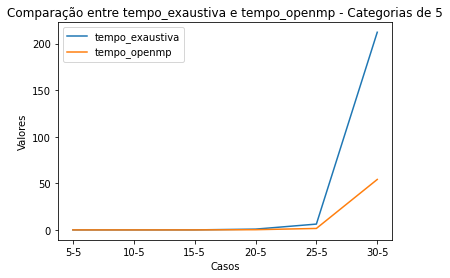

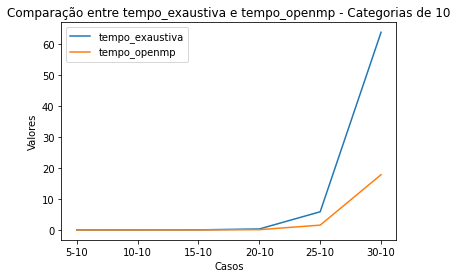

In [43]:
import matplotlib.pyplot as plt


# Gráfico para as categorias de 5
x = tempo_exaustiva.filter(regex='-5').columns
y1 = tempo_exaustiva.filter(regex='-5').values[0]
y2 = tempo_openmp.filter(regex='-5').values[0]

plt.plot(x, y1, label='tempo_exaustiva')
plt.plot(x, y2, label='tempo_openmp')
plt.xlabel('Casos')
plt.ylabel('Valores')
plt.title('Comparação entre tempo_exaustiva e tempo_openmp - Categorias de 5')
plt.legend()
plt.show()

# Gráfico para as categorias de 10
x = tempo_exaustiva.filter(regex='-10').columns
y1 = tempo_exaustiva.filter(regex='-10').values[0]
y2 = tempo_openmp.filter(regex='-10').values[0]

plt.plot(x, y1, label='tempo_exaustiva')
plt.plot(x, y2, label='tempo_openmp')
plt.xlabel('Casos')
plt.ylabel('Valores')
plt.title('Comparação entre tempo_exaustiva e tempo_openmp - Categorias de 10')
plt.legend()
plt.show()


## Paralelismo com GPU

Outra maneira de paralelisar o código afim de otimizar o tempo de execução seria através da aceleração com GPU, que tem como vantagem em relação ao processamento sequencial em CPU aspectos como:

- Poder de processamento massivamente paralelo: As GPUs (Unidades de Processamento Gráfico) são projetadas para executar uma grande quantidade de operações simultaneamente. Elas possuem centenas ou até mesmo milhares de núcleos de processamento, permitindo a execução de um grande número de tarefas em paralelo. Isso possibilita o processamento eficiente de algoritmos que podem ser divididos em tarefas independentes.

- Aceleração do desempenho: Devido à natureza paralela das GPUs, é possível obter um significativo aumento de desempenho em comparação com a execução sequencial em CPU. Tarefas que levam muito tempo para serem executadas em CPU podem ser processadas de forma muito mais rápida em GPU, resultando em tempos de execução reduzidos e maior eficiência computacional.

- Manipulação eficiente de grandes volumes de dados: GPUs são particularmente eficazes no processamento de grandes volumes de dados simultaneamente. Com sua arquitetura paralela, as GPUs podem lidar com a computação de operações em massa em matrizes, vetores e estruturas de dados complexas com grande eficiência. Isso é especialmente útil em problemas que envolvem análise de dados, aprendizado de máquina e processamento de imagens.

- Bibliotecas e ferramentas otimizadas: Existem várias bibliotecas e ferramentas otimizadas para desenvolvimento em GPU, como CUDA, OpenCL e Thrust (nosso caso). Essas bibliotecas fornecem abstrações de alto nível e algoritmos otimizados para facilitar a implementação de código paralelo em GPU. Elas ajudam a aproveitar ao máximo o potencial de processamento das GPUs, simplificando o desenvolvimento e acelerando o tempo de implementação.

- Maior flexibilidade e escalabilidade: O uso de GPUs permite maior flexibilidade e escalabilidade em relação ao processamento em CPU. É possível adicionar várias GPUs em um sistema para aproveitar o paralelismo em larga escala, distribuindo a carga de trabalho entre elas. Isso possibilita a execução de algoritmos mais complexos e exigentes, que podem se beneficiar do processamento em larga escala.

- Em resumo, o paralelismo com GPU oferece vantagens significativas, como poder de processamento massivamente paralelo, aceleração do desempenho, manipulação eficiente de grandes volumes de dados, bibliotecas otimizadas e flexibilidade/escalabilidade. Essas vantagens tornam o paralelismo com GPU uma escolha atraente para acelerar algoritmos e lidar com problemas computacionalmente intensivos.

!nvcc -arch=sm_70 -std=c++14 a.cu -o a

import time
runtime_gpu = {}
filmes_gpu = {}
tela_gpu = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_gpu:
            runtime_gpu[key] = []
        if key not in filmes_gpu:
            filmes_gpu[key] = []
        if key not in tela_gpu:
            tela_gpu[key] = []
        start_time = time.time()
        !./a < Inputs-2/input-{i}-{j}.txt > Outputs-2/outgpu-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_gpu[key].append(runtime)
        filmes_gpu[key].append(filmes_escolhidos(f'Outputs-2/outgpu-{i}-{j}.txt'))
        tela_gpu[key].append(tempo_tela(f'Outputs-2/outgpu-{i}-{j}.txt'))